# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
%matplotlib notebook

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
clinical_study_complete = pd.merge(study_results,mouse_metadata, how='left', on=['Mouse ID', 'Mouse ID'])

# Display the data table for preview
clinical_study_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
mice_count = clinical_study_complete['Mouse ID'].nunique()
print(mice_count)

249


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = clinical_study_complete[clinical_study_complete.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mice_ids = duplicate_mice['Mouse ID'].unique()

duplicate_mice_ids

array(['g989'], dtype=object)

In [5]:
mouse_dups=clinical_study_complete.loc[clinical_study_complete['Mouse ID']=='g989']

mouse_dups

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
#Create a clean DataFrame by dropping the duplicate mouse by its ID.

clinical_study_clean=clinical_study_complete[clinical_study_complete['Mouse ID'].isin(duplicate_mice_ids)== False]

#clean_mice = clinical_study_complete.drop_duplicates(subset='Mouse ID', keep='first')

clinical_study_clean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.(answer should be 248)
(clinical_study_clean['Mouse ID'].nunique())

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = clinical_study_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
median = clinical_study_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
variance = clinical_study_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
standard_deviation = clinical_study_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()

sem = standard_deviation / np.sqrt(clinical_study_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].count())


tumor_volume_stats={
                        'Mean Tumor Volume': mean,
                        'Median Tumor Volume':median,
                        'Tumor Volume Variance':variance,
                        'Tumor Volume Std Dev.': standard_deviation,
                        'Tumor Volume Std. Err.': sem
                       
                      
}

df=pd.DataFrame(tumor_volume_stats)

df.head()





# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [41]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
tumor_volume_summary = clinical_study_clean.groupby(['Drug Regimen']).agg({
                        "Tumor Volume (mm3)": ['mean', 'median', 'var', 'std',
                         'sem']                                            
                    
                    })
           






tumor_volume_summary


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [10]:
clinical_study_clean.columns


Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'],
      dtype='object')

In [11]:
drug_regimen = clinical_study_clean['Drug Regimen'].value_counts()

drug_regimen

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

<IPython.core.display.Javascript object>


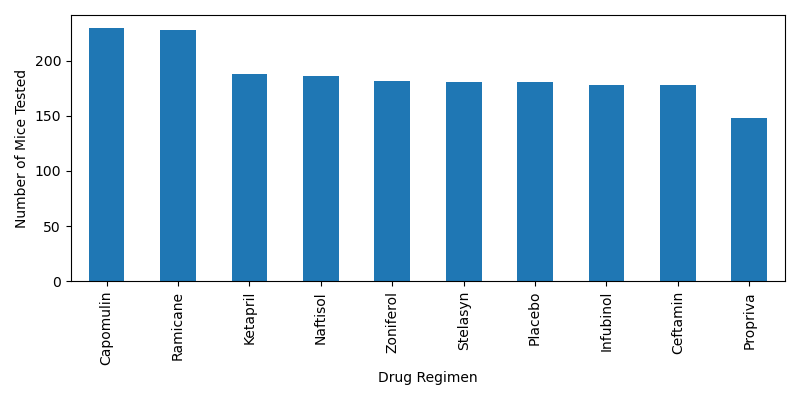

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.figure(figsize=(8,4))
drug_regimen.plot(kind='bar')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')


plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


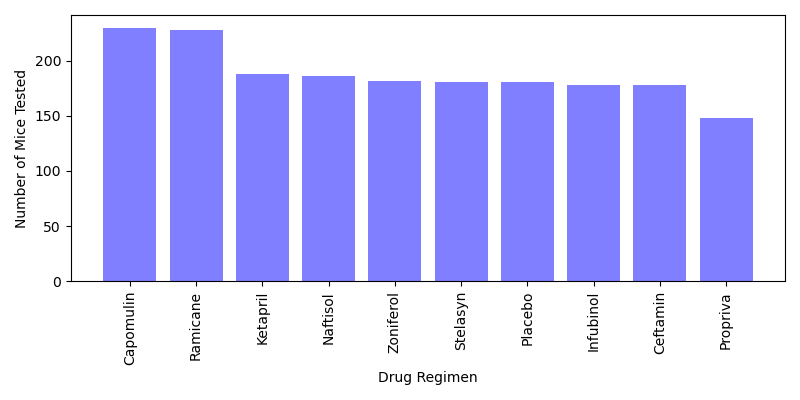

In [13]:
plt.figure(figsize=(8,4))

plt.bar(drug_regimen.index, drug_regimen.values, color='blue', alpha=0.5)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.xticks(rotation='vertical')


plt.tight_layout()
plt.show()

In [14]:
total_mice = clinical_study_clean['Sex'].count()

total_mice


1880

In [15]:
male_mice = clinical_study_clean.loc[clinical_study_complete['Sex']=='Male']

male_count = male_mice['Sex'].value_counts()                                       
                                     
print(male_count)                                                      
                     

Male    958
Name: Sex, dtype: int64


In [16]:


female_mice = clinical_study_clean.loc[clinical_study_complete['Sex']=='Female']

female_count = female_mice['Sex'].value_counts()                                       
                                     
print(female_count)                                                      
                                    

Female    922
Name: Sex, dtype: int64


<IPython.core.display.Javascript object>


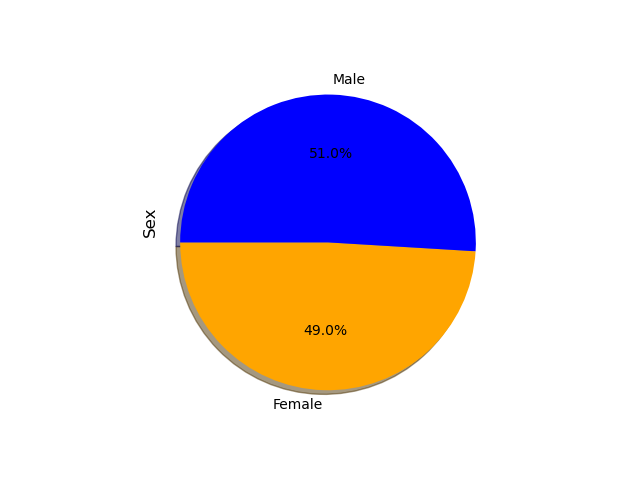

In [32]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice = ['Female', 'Male']
mice_counts = [922, 958]
df = pd.DataFrame({'Sex': mice, 'Counts': mice_counts})

colors = ['orange', 'blue']
df.plot(kind='pie', y='Counts', labels=df['Sex'], colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=180, legend=False, ylabel='')

plt.title("Sex", loc='left', y=0.5, rotation='vertical')
plt.show()

<IPython.core.display.Javascript object>


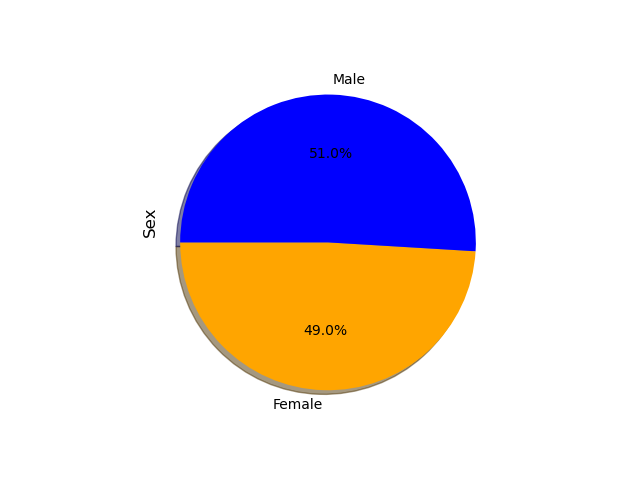

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice = ['Female','Male']
mice_counts= [922,958]
colors= ['orange','blue']

plt.figure()
plt.pie(mice_counts, labels=mice, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=180)
        
plt.title("Sex", loc='left', y=0.5, rotation='vertical')
        
plt.show()

## Quartiles, Outliers and Boxplots

In [43]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint=clinical_study_clean.groupby('Mouse ID')
last_timepoint=last_timepoint['Timepoint'].max()
final_tum_volume=clinical_study_clean.groupby(['Mouse ID', 'Drug Regimen'])['Timepoint'].max().to_frame()

print(final_tum_volume)
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint



clinical_study_merge = pd.merge(clinical_study_clean, final_tum_volume, how='left', on=['Mouse ID',
                                                                                 
                                                                               'Mouse ID'])

                       Timepoint
Mouse ID Drug Regimen           
a203     Infubinol            45
a251     Infubinol            45
a262     Placebo              45
a275     Ceftamin             45
a366     Stelasyn             30
...                          ...
z435     Propriva             10
z578     Ramicane             45
z581     Infubinol            45
z795     Naftisol             45
z969     Naftisol             45

[248 rows x 1 columns]


In [20]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [21]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.



## Line and Scatter Plots

In [22]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin



In [23]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen



## Correlation and Regression

In [24]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

